##  Мини-отчёт - анализ лояльности по удержанию клиентов 
Банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Загружаем датасет и выводим первые 5 рядов данных для ознакомления 
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Создаем копию данных с которой в дальнейшем будем работать
data_df = churn_data.copy()

## Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

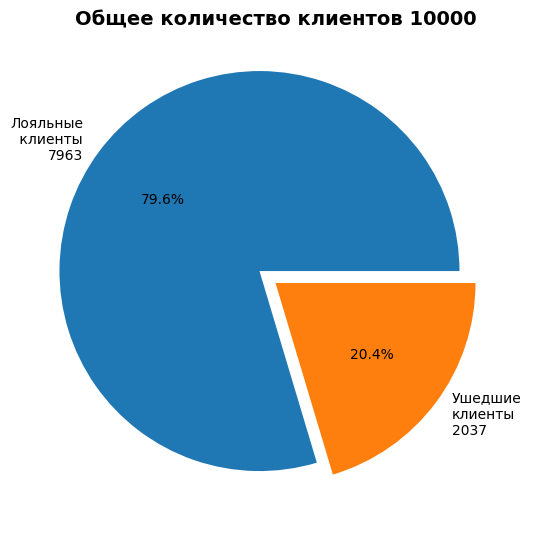

In [4]:
# Отношение лояльных и ушедших клиентов
loyal_customer_rate = data_df.value_counts(['Exited'])
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
loyal_clients_str = f'Лояльные\n клиенты\n{loyal_customer_rate.loc[0].values[0]}'
exited_clients_str = f'Ушедшие\nклиенты\n{loyal_customer_rate.loc[1].values[0]}'
total_account_str = f'Общее количество клиентов {loyal_customer_rate.loc[0].values[0] + loyal_customer_rate.loc[1].values[0]}'
axes.pie(
    loyal_customer_rate,
    labels=[loyal_clients_str,exited_clients_str],
    autopct='%.1f%%',
    explode = [0.1, 0]
);
axes.set_title(total_account_str, fontsize=14, fontweight='bold') 
plt.show()

In [5]:
loyal_customer_rate.loc[0].values[0]

np.int64(7963)

Как видно, большинство клиентов, 79,6% от общего числа, являются лояльными. Эти клиенты регулярно пользуются услугами банка, остаются удовлетворенными своим опытом. Их лояльность свидетельствует о высоком уровне доверия, удовлетворенности и восприятия ценности ваших предложений.
Меньшая часть клиентов (20,4%) ушла или прекратила отношения. Это может быть связано с различными причинами, такими как неудовлетворенность, переход к конкурентам или изменение потребностей. Понимание причин их ухода крайне важно для улучшения стратегий удержания клиентов и решения любых скрытых проблем.

## Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

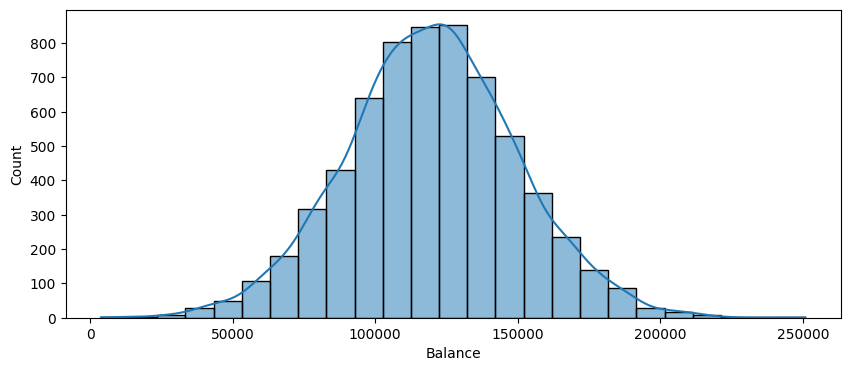

In [6]:
# Фильруем клиентов с суммой на счете более 2500 долларов
data_df_filtred = data_df[data_df['Balance'] > 2500] 
# Создаем гистограмму отображающую распредление
fig = plt.figure(figsize=(10, 4))
sns.histplot(
    data=data_df_filtred,
    x='Balance',
    bins=25,
    kde=True
);

In [7]:
# Посчитаем общее число клиентов суммой на счете  
zero_clients_acc_count = data_df[data_df['Balance'] == 0].shape[0]
print(f'Clients with zero account {zero_clients_acc_count}')

Clients with zero account 3617


Большая часть лояльных клиентов имеет счета с балансом в диапазоне от 90 тыс. до 150 тыс. По всей видимости услуги предоставляемы банком наиболее интересны вкладчикам с размером счета не менее 90к.

## Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0.5, 1.0, 'Exited client accounts balance')

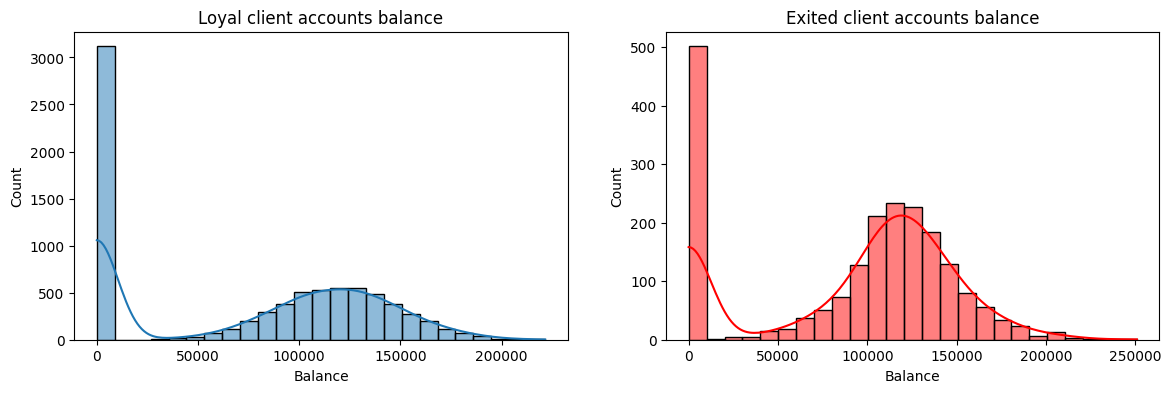

In [8]:
loyal_cliets_balance = data_df[data_df['Exited'] == 0]
exited_cliets_balance = data_df[data_df['Exited'] == 1]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.histplot(
    data=loyal_cliets_balance,
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0]
);

sns.histplot(
    data=exited_cliets_balance,
    x='Balance',
    bins=25,
    color='red',
    kde=True,
    ax=axes[1]
);
axes[0].set_title('Loyal client accounts balance', fontsize=12)
axes[1].set_title('Exited client accounts balance', fontsize=12)

Лояльные клиенты:
* Большинство лояльных клиентов имеют баланс на счетах в диапазоне от 50,000 до 150,000.
* Пик количества лояльных клиентов приходится на баланс около 100,000.
* Небольшое количество лояльных клиентов имеет баланс выше 150,000.

Ушедшие клиенты:
* Ушедшие клиенты чаще имеют баланс на счетах ниже 50,000.
* Небольшое количество ушедших клиентов имеет баланс выше 100,000, но их количество значительно меньше, чем у лояльных клиентов.

Выводы:
* Лояльные клиенты, имеют более высокий баланс на счетах, что может свидетельствовать о более стабильном финансовом положении и доверии к банку.
* Ушедшие клиенты чаще имеют низкий баланс что может указывать на финансовые трудности или недовольство условиями обслуживания.

## Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [9]:
age_cliets_destribution_churned = data_df[data_df['Exited'] == 1]

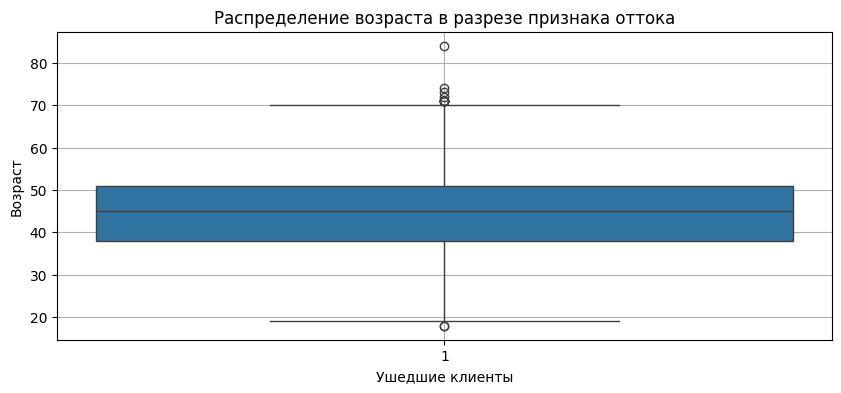

In [10]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=age_cliets_destribution_churned,
    y='Age',
    x='Exited',
    width=0.9
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Ушедшие клиенты');
boxplot.set_ylabel('Возраст');
boxplot.grid()

Распределение возраста среди ушедших клиентов:

* Основной диапазон возраста ушедших клиентов составляет от 38 до 52 лет.
* На графике также можно заметить, что есть несколько клиентов старше 70 лет, что может указывать на потенциальные выбросы в этой возрастной категории.


Возможные причины  ухода молодых клиентов:

* Люди в возрасте от 38 до 52 лет находятся в активной фазе своей профессиональной и финансовой жизни. Они могут быть более склонны к переменам, таким как смена банка, если их потребности не удовлетворяются или если они находят более выгодные условия у конкурентов.

Выбросы:

* Выбросы, приходятся на возрастные категории старше 70 лет. возможно клиенты этой возрастной группы имеют специфические потребности или проблемы, которые не были удовлетворены банком.



## Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

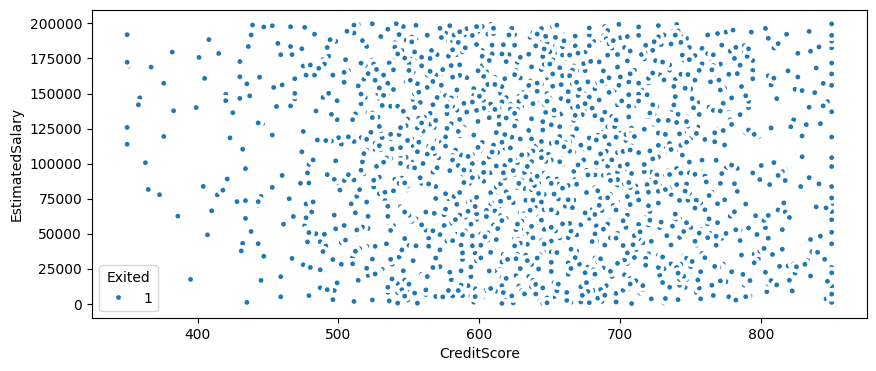

In [11]:
fig = plt.figure(figsize=(10, 4))
sns.scatterplot(data=age_cliets_destribution_churned, palette="tab10", linewidth=2.5, x='CreditScore', y='EstimatedSalary', hue='Exited')

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

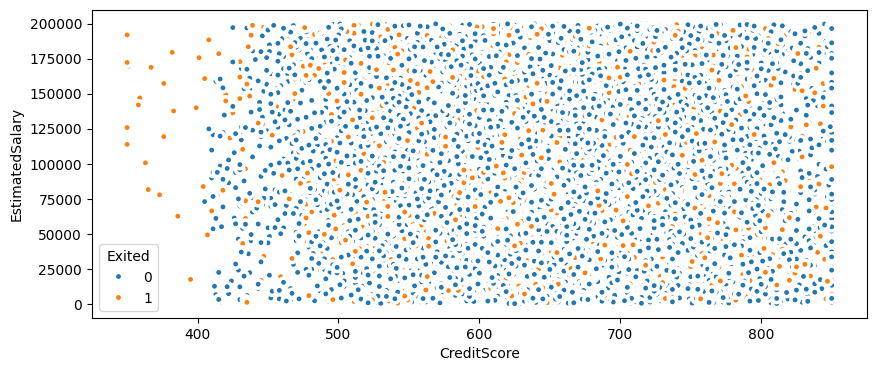

In [12]:
fig = plt.figure(figsize=(10, 4))
sns.scatterplot(data=data_df, palette="tab10", linewidth=2.5, x='CreditScore', y='EstimatedSalary', hue='Exited')

На графиках не видно взаимосвязи между кредитным рейтингом и уровнем заработной платы ни для ушедших клиентов ни для лояльных 

## Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

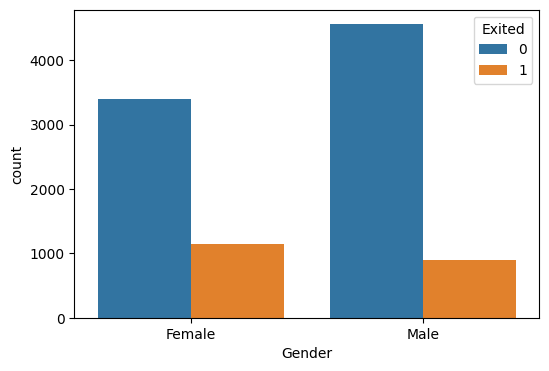

In [13]:
# Draw a nested barplot by species and sex
fig = plt.figure(figsize=(6, 4))
g = sns.countplot(x='Gender', hue='Exited', data=data_df)

Женщины составляют большую часть ушедших клиентов, что видно по более низкому соотношению между ушедшими и лояльными клиентами в категории "Female".

## Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

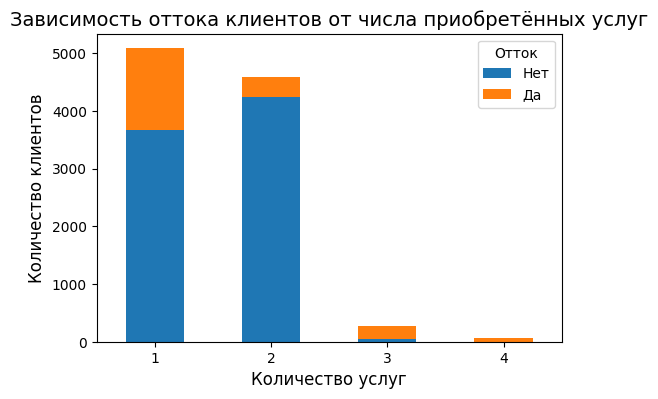

In [14]:
grouped_data = data_df.groupby(['NumOfProducts', 'Exited']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Зависимость оттока клиентов от числа приобретённых услуг', fontsize=14)
plt.xlabel('Количество услуг', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend(title='Отток', labels=['Нет', 'Да'])
plt.xticks(rotation=0)
plt.show()

Из графиках видно, что 

* Лояльные клиенты в основном пользуются услугами 1 и 2. Это может указывать на то, что услуги 1 и 2 являются наиболее востребованными и полезными для клиентов, что способствует их удержанию.

* Среди ушедших клиентов также значительная доля была подписана на услугу 1. Это может означать, что услуга 1, несмотря на её популярность, не всегда способствует удержанию клиентов, если другие факторы.

* Услуги 3 и 4 не пользуются большой популярностью как среди лояльных, так и среди ушедших клиентов. Это может быть связано с тем, что эти услуги не соответствуют потребностям клиентов или их ценность недостаточно ясна.

## Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

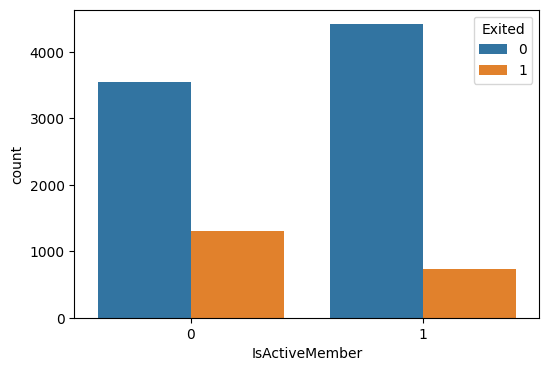

In [15]:
fig = plt.figure(figsize=(6, 4))
g = sns.countplot(x='IsActiveMember', hue='Exited', data=data_df)

Активные клиенты (IsActiveMember = 1) составляют меньшую часть ушедших клиентов по сравнению с неактивными клиентами (IsActiveMember = 0), следовательно активные клиенты реже уходят, чем неактивные. Это может быть связано с тем, что активные клиенты чаще взаимодействуют с банком, знают лучше продукты и услуги, получают и больше выгоды. 

##  В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

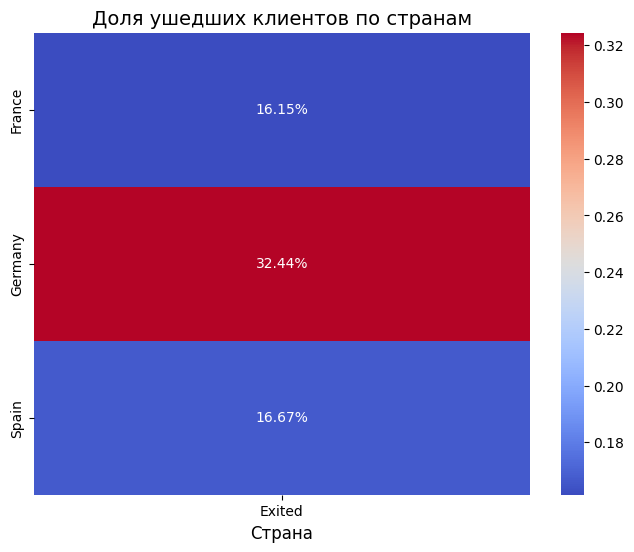

In [16]:
churn_rate = data_df.groupby('Geography')['Exited'].mean().reset_index()
churn_rate.columns = ['Geography', 'Exited']
heatmap_data = churn_rate.set_index('Geography')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2%', cbar=True)
plt.title('Доля ушедших клиентов по странам', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('')
plt.show()


## Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [17]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [18]:
data_df['CreditScoreCat'] = data_df['CreditScore'].apply(get_credit_score_cat)
data_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


In [19]:
pivot_table = pd.pivot_table(
    data_df,
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

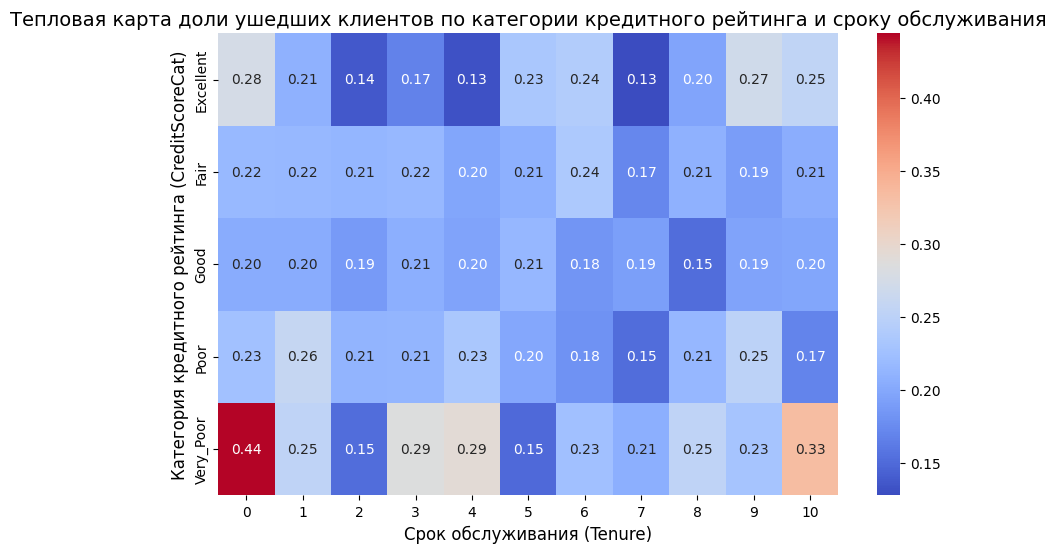

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Тепловая карта доли ушедших клиентов по категории кредитного рейтинга и сроку обслуживания', fontsize=14)
plt.xlabel('Срок обслуживания (Tenure)', fontsize=12)
plt.ylabel('Категория кредитного рейтинга (CreditScoreCat)', fontsize=12)
plt.show()